<h1> Description: </h1>
<h2> Questions: </h2>
- Most used chatwheel type
- What chatwheel option wins the most games
- Do teams that chat more win more games. Compare lots of chat with little chat
- Do teams that chat win faster than those with little chat
- Do more chatwheel win faster
- Link between chat and number of players
- Does chat increase or decrease as the rank increases
- Does chatwheel increase or decrease as the rank increases
<h2> Metric: </h2>
<h1> Imports </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings('ignore')

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

pd.set_option("display.float_format", lambda x: "{:.3f}".format(x)) #Limiting floats output to 3 decimal points
pd.set_option("display.max_columns", None)

<h1> Load the Data </h1>

In [2]:
data = pd.read_json("../Data/merged_matches_with_chat.json")
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,league,radiant_team,dire_team,chat_count,start_time,avg_mmr,num_mmr,avg_rank_tier,num_rank_tier
0,6807355417,0,63,"[{'time': -83, 'type': 'chatwheel', 'key': '14...",273,"{'647': 0, '4009': 131, '4022': 131, '4023': 1...",28,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",2264,1,100,22,10,0,0,5700223580,0,"[{'time': 100, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': True, 'hero_id': 31, 'team': 0, '...",0,"[0, 72, 432, 277, 116, 681, 463, 601, 961, 143...",44,NaN,True,"[0, 137, 265, 304, 319, 824, 259, 694, 736, 10...",NaN,"[{'start': 573, 'end': 615, 'last_death': 600,...",0,1974,21,897833634,0,0,"[{'match_id': 6807355417, 'player_slot': 0, 'a...",51,3,http://replay273.valve.net/570/6807355417_8978...,"{'sorry': 3, 'pugnas': 1, 'model': 1, 'didnt':...",{},0.000,12337.000,NaN,NaN,None,None,None,31,2022-10-15 19:16:52,2941.000,3.000,34,8
1,6807356900,63,51,"[{'time': -71, 'type': 'chatwheel', 'key': '86...",186,"{'647': 131, '4870': 1, '6141': 4, '6142': 4, ...",52,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",1945,1,18,22,10,0,7,5700212897,0,"[{'time': 653, 'type': 'building_kill', 'unit'...","[{'is_pick': True, 'hero_id': 97, 'team': 1, '...",0,"[12, -224, -82, -353, -390, -195, -670, -1215,...",16,NaN,False,"[0, 169, 56, -101, -65, 159, -39, -784, -440, ...",NaN,"[{'start': 401, 'end': 440, 'last_death': 425,...",1974,391,21,1289242017,0,0,"[{'match_id': 6807356900, 'player_slot': 0, 'a...",51,8,http://replay186.valve.net/570/6807356900_1289...,{},{},NaN,NaN,369.000,19030.000,None,None,None,0,2022-10-15 19:17:53,2996.000,2.000,32,7
2,6807357403,51,63,"[{'time': -849, 'type': 'chatwheel', 'key': '4...",192,"{'647': 131, '4991': 130, '5090': 0, '7125': 0...",31,8851608.000,"[{'order': 1, 'pick': False, 'active_team': 3,...",2215,1,126,2,10,0,9,5700244648,0,"[{'time': 125, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 66, 'team': 1, ...",0,"[0, 154, 108, 1080, 791, 799, 1354, 167, -583,...",50,8852695.000,True,"[0, 279, 324, 1062, 1027, 1230, 1292, 638, -15...",NaN,"[{'start': 280, 'end': 328, 'last_death': 313,...",388,1846,21,229078240,0,0,"[{'match_id': 6807357403, 'player_slot': 0, 'a...",51,9,http://replay192.valve.net/570/6807357403_2290...,"{'mins': 1, 'brb': 1, 'хочешь': 2, 'ofc': 1, '...",{},6096.000,7008.000,NaN,NaN,None,None,None,51,2022-10-15 19:18:19,5687.000,5.000,81,7
3,6807620917,63,51,"[{'time': 357, 'type': 'chatwheel', 'key': '71...",273,"{'647': 0, '4692': 3, '6154': 3, '6158': 3, '7...",36,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",2331,1,0,22,10,0,0,5700459724,0,"[{'time': -13, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': True, 'hero_id': 64, 'team': 0, '...",0,"[134, 175, 574, 570, 286, 1154, 1861, 2477, 23...",43,NaN,False,"[-2, 186, 373, 497, 715, 1016, 1588, 2173, 230...",NaN,"[{'start': 719, 'end': 760, 'last_death': 745,...",1830,390,21,393277211,0,0,"[{'match_id': 6807620917, 'player_slot': 0, 'a...",51,3,http://replay273.valve.net/570/6807620917_3932...,"{'gg': 3, 'wow': 1, 'wp': 1}",{},NaN,NaN,8783.000,2663.000,None,None,None,3,2022-10-15 23:25:15,2418.000,1.000,32,4
4,6807359513,16,63,"[{'time': -74, 'type': 'chatwheel', 'key': '75...",187,"{'647': 3, '684': 131, '4064': 4, '4159': 4, '...",28,NaN,"[{'order': 1, 'pick': False, 'active_team': 2,...",2226,1,151,22,10,0,7,5700221651,0,"[{'time': 152, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': True, 'hero_id': 53, 'team': 0, '...",0,"[0, -2, 1, 244, 92, 134, 416, 1086, 599

<h1> EDA </h1>

<h2> Describe </h2>

In [3]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,dire_team_id,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,positive_votes,radiant_score,radiant_team_id,skill,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,patch,region,throw,loss,comeback,stomp,chat_count,avg_mmr,num_mmr,avg_rank_tier,num_rank_tier
count,1111.000,1111.000,1111.000,1111.000,1111.000,45.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,46.000,0.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,1111.000,538.000,538.000,573.000,573.000,1111.000,919.000,919.000,1111.000,1111.000
mean,6806569698.536,41.068,37.138,197.392,38.859,7291102.533,2465.874,1.000,101.282,19.837,10.000,538.970,4.109,5699524494.288,0.000,0.000,37.966,7354408.870,NaN,1066.623,982.371,21.000,1058708846.906,26349.041,0.035,51.000,6.207,3671.502,18010.286,2775.436,21392.792,12.015,3687.256,2.679,48.741,5.458
std,1157718.074,26.767,28.428,55.233,15.551,2706414.305,679.050,0.000,96.454,6.032,0.000,2721.607,3.425,1036915.524,0.000,0.000,15.527,2676240.659,NaN,909.132,920.430,0.000,616184834.795,134666.738,0.184,0.000,4.668,5446.974,8995.142,4005.697,9240.169,20.332,1495.704,1.743,20.680,2.006
min,6804735400.000,0.000,0.000,117.000,0.000,39.000,400.000,1.000,0.000,2.000,10.000,0.000,0.000,5697880838.000,0.000,0.000,0.000,15.000,NaN,0.000,0.000,21.000,238009.000,0.000,0.000,51.000,1.000,-832.000,-324.000,-847.000,0.000,0.000,1.000,1.000,12.000,2.000
25%,6805548808.000,3.000,0.000,152.000,27.000,7119388.000,2035.500,1.000,10.000,22.000,10.000,0.000,0.000,5698611075.500,0.000,0.000,27.000,7476552.000,NaN,4.000,0.000,21.000,532484904.000,0.000,0.000,51.000,3.000,208.750,11504.750,124.000,15308.000,2.000,2787.000,1.000,32.000,4.000
50%,6806406616.000,51.000,51.000,185.000,40.000,8605863.000,2441.000,1.000,91.000,22.000,10.000,0.000,7.000,5699376726.000,0.000,0.000,39.000,8599101.000,NaN,1540.000,512.000,21.000,1024327470.000,0.000,0.000,51.000,5.000,1320.000,18307.000,1119.000,21744.000,6.000,3437.000,2.000,44.000,5.000
75%,6807541110.000,63.000,63.000,273.000,50.000,8794067.000,2878.000,1.000,153.000,22.000,10.000,0.000,7.000,5700387760.500,0.000,0.000,49.000,8774896.000,NaN,1974.000,1974.000,21.000,1602310554.500,0.000,0.000,51.000,8.000,4696.000,24571.250,4012.000,27086.000,13.000,4296.000,4.000,64.000,7.000
max,6808759200.000,63.000,63.000,347.000,76.000,8854994.000,5271.000,1.000,658.000,22.000,10.000,14679.000,9.000,5701496992.000,0.000,0.000,87.000,8855028.000,NaN,2047.000,2047.000,21.000,2145740359.000,714282.000,1.000,51.000,38.000,39322.000,42943.000,24192.000,52657.000,201.000,8464.000,10.000,81.000,10.000


<h1> Missing Values</h1>

<AxesSubplot:>

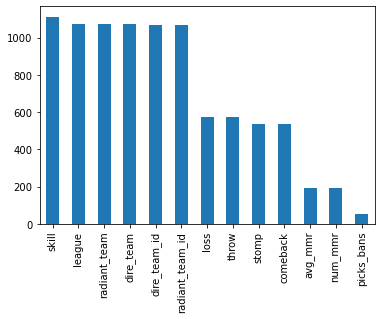

In [6]:
data_missing = data.isnull().sum().sort_values(ascending=False)
data_missing = data_missing[data_missing > 0]

data_missing.plot.bar()

In [7]:
data_missing = pd.concat([data_missing,data_missing/len(data)], axis=1)
data_missing.rename({0:"Data Missing",
                    1:"Data Missing Percentage"}, axis='columns')

,Data Missing,Data Missing Percentage
skill,1111,1.000
league,1071,0.964
radiant_team,1071,0.964
dire_team,1071,0.964
dire_team_id,1066,0.959
radiant_team_id,1065,0.959
loss,573,0.516
throw,573,0.516
stomp,538,0.484
comeback,538,0.484


<h1> Analysis </h1>
<h2> Most used chatwheel type </h2>

In [ ]:
## Chatwheel conversion
## Radiant player_slot goes 0-4 Dire player_slots between 128-132

In [29]:
print(len(data['chat']), "games")
data[['match_id','chat']]

1111 games


,match_id,chat
0,6807355417,"[{'time': -83, 'type': 'chatwheel', 'key': '14..."
1,6807356900,"[{'time': -71, 'type': 'chatwheel', 'key': '86..."
2,6807357403,"[{'time': -849, 'type': 'chatwheel', 'key': '4..."
3,6807620917,"[{'time': 357, 'type': 'chatwheel', 'key': '71..."
4,6807359513,"[{'time': -74, 'type': 'chatwheel', 'key': '75..."
...,...,...
1106,6804863704,"[{'time': -82, 'type': 'chatwheel', 'key': '47..."
1107,6805519218,"[{'time': -34, 'type': 'chatwheel', 'key': '58..."
1108,6805781409,"[{'time': -69, 'type': 'chatwheel', 'key': '44..."
1109,6805258012,"[{'time': -214, 'type': 'chat', 'key': 'ban ve..."


In [30]:
print(len(data['chat'][0]), "Messages in the game")
data['chat'][0]

83 Messages in the game


[{'time': -83,
  'type': 'chatwheel',
  'key': '14015',
  'slot': 0,
  'player_slot': 0},
 {'time': 56, 'type': 'chatwheel', 'key': '1', 'slot': 1, 'player_slot': 1},
 {'time': 141, 'type': 'chatwheel', 'key': '10', 'slot': 2, 'player_slot': 2},
 {'time': 182,
  'type': 'chat',
  'key': "sorry pugna's model didn't load for me and I couldn't click xD",
  'slot': 6,
  'player_slot': 129},
 {'time': 182, 'type': 'chat', 'key': 'Xd', 'slot': 2, 'player_slot': 2},
 {'time': 259, 'type': 'chatwheel', 'key': '7', 'slot': 1, 'player_slot': 1},
 {'time': 366, 'type': 'chatwheel', 'key': '71', 'slot': 4, 'player_slot': 4},
 {'time': 366, 'type': 'chatwheel', 'key': '71', 'slot': 4, 'player_slot': 4},
 {'time': 377,
  'type': 'chat',
  'key': 'clockwerk seems to have the same issue xD',
  'slot': 6,
  'player_slot': 129},
 {'time': 377,
  'type': 'chat',
  'key': 'and axe',
  'slot': 6,
  'player_slot': 129},
 {'time': 377,
  'type': 'chat',
  'key': 'pay 2 win set',
  'slot': 9,
  'player_slot':

In [31]:
print(len(data['chat'][0][0]), "Features in the message")
data['chat'][0][0]

5 Features in the message


{'time': -83, 'type': 'chatwheel', 'key': '14015', 'slot': 0, 'player_slot': 0}

<h3> Split Dire and Radiant messages </h3>

In [116]:
errors = 0
Radiant_chat = []
Dire_chat = []
for i in range(len(data['chat'])): #For each game
    
    Radiant_holder = []
    Dire_holder = []
    
    for a in range(len(data['chat'][i])): #For each message in the game
        
        try:
            
            if(data['chat'][i][a]['player_slot'] >=0 and data['chat'][i][a]['player_slot'] <= 4):
                #Radiant
                Radiant_holder.append(data['chat'][i][a])
                
            elif(data['chat'][i][a]['player_slot'] >=128 and data['chat'][i][a]['player_slot'] <= 132):
                #Dire
                Dire_holder.append(data['chat'][i][a])
                
        except:
            
            errors = errors + 1
            
    Radiant_chat.append([data['match_id'][i], Radiant_holder, len(Radiant_holder)])
    Dire_chat.append([data['match_id'][i], Dire_holder, len(Dire_holder)])

Radiant_chat = pd.DataFrame(Radiant_chat)
Radiant_chat.columns=["match_id","chat","num_messages"]
Dire_chat = pd.DataFrame(Dire_chat)
Dire_chat.columns=["match_id","chat","num_messages"]
print(errors, "errors")
print("Radiant: ",len(Radiant_chat),"Dire: ", len(Dire_chat))

14 errors
Radiant:  1111 Dire:  1111


In [117]:
Radiant_chat

,match_id,chat,num_messages
0,6807355417,"[{'time': -83, 'type': 'chatwheel', 'key': '14...",59
1,6807356900,"[{'time': -38, 'type': 'chatwheel', 'key': '46...",12
2,6807357403,"[{'time': -849, 'type': 'chatwheel', 'key': '4...",116
3,6807620917,"[{'time': 357, 'type': 'chatwheel', 'key': '71...",9
4,6807359513,"[{'time': 345, 'type': 'chatwheel', 'key': '71...",22
...,...,...,...
1106,6804863704,"[{'time': 403, 'type': 'chatwheel', 'key': '11...",49
1107,6805519218,"[{'time': 4, 'type': 'chat', 'key': 'NUB VENO'...",5
1108,6805781409,"[{'time': -69, 'type': 'chatwheel', 'key': '44...",25
1109,6805258012,"[{'time': -209, 'type': 'chat', 'key': 'trauma...",135


In [118]:
Dire_chat

,match_id,chat,num_messages
0,6807355417,"[{'time': 182, 'type': 'chat', 'key': 'sorry p...",24
1,6807356900,"[{'time': -71, 'type': 'chatwheel', 'key': '86...",35
2,6807357403,"[{'time': -88, 'type': 'chatwheel', 'key': '12...",73
3,6807620917,"[{'time': 723, 'type': 'chatwheel', 'key': '71...",6
4,6807359513,"[{'time': -74, 'type': 'chatwheel', 'key': '75...",19
...,...,...,...
1106,6804863704,"[{'time': -82, 'type': 'chatwheel', 'key': '47...",379
1107,6805519218,"[{'time': -34, 'type': 'chatwheel', 'key': '58...",54
1108,6805781409,"[{'time': -61, 'type': 'chatwheel', 'key': '45...",23
1109,6805258012,"[{'time': -214, 'type': 'chat', 'key': 'ban ve...",107


In [137]:
data[data['match_id'] == Radiant_chat['match_id']]['radiant_win']

0        True
1       False
2        True
3       False
4        True
        ...  
1106     True
1107    False
1108     True
1109    False
1110     True
Name: radiant_win, Length: 1111, dtype: bool

<h3>Create a table to describe chat interactions and which team won</h3>

In [138]:
winner_data = data[['match_id','radiant_win']]
merge = pd.merge(Radiant_chat, Dire_chat, on=['match_id'])

In [139]:
merge = pd.merge(merge,winner_data, on=['match_id'])
merge

,match_id,chat_x,num_messages_x,chat_y,num_messages_y,radiant_win
0,6807355417,"[{'time': -83, 'type': 'chatwheel', 'key': '14...",59,"[{'time': 182, 'type': 'chat', 'key': 'sorry p...",24,True
1,6807356900,"[{'time': -38, 'type': 'chatwheel', 'key': '46...",12,"[{'time': -71, 'type': 'chatwheel', 'key': '86...",35,False
2,6807357403,"[{'time': -849, 'type': 'chatwheel', 'key': '4...",116,"[{'time': -88, 'type': 'chatwheel', 'key': '12...",73,True
3,6807620917,"[{'time': 357, 'type': 'chatwheel', 'key': '71...",9,"[{'time': 723, 'type': 'chatwheel', 'key': '71...",6,False
4,6807359513,"[{'time': 345, 'type': 'chatwheel', 'key': '71...",22,"[{'time': -74, 'type': 'chatwheel', 'key': '75...",19,True
...,...,...,...,...,...,...
1106,6804863704,"[{'time': 403, 'type': 'chatwheel', 'key': '11...",49,"[{'time': -82, 'type': 'chatwheel', 'key': '47...",379,True
1107,6805519218,"[{'time': 4, 'type': 'chat', 'key': 'NUB VENO'...",5,"[{'time': -34, 'type': 'chatwheel', 'key': '58...",54,False
1108,6805781409,"[{'time': -69, 'type': 'chatwheel', 'key': '44...",25,"[{'time': -61, 'type': 'chatwheel', 'key': '45...",23,True
1109,6805258012,"[{'time': -209, 'type': 'chat', 'key': 'trauma...",135,"[{'time': -214, 'type': 'chat', 'key': 'ban ve...",107,False


In [144]:
merge = merge.rename(columns={'match_id':'match_id','chat_x':'radiant_chat','num_messages_x':'num_radiant_messages','chat_y':'dire_chat','num_messages_y':'num_dire_messages','radiant_win':'radiant_win'})

In [146]:
radiant_wins = merge[['match_id','num_radiant_messages','radiant_win']]
dire_wins = merge[['match_id','num_dire_messages','radiant_win']]
dire_wins['radiant_win'] = ~dire_wins['radiant_win']

In [147]:
dire_wins

,match_id,num_dire_messages,radiant_win
0,6807355417,24,False
1,6807356900,35,True
2,6807357403,73,False
3,6807620917,6,True
4,6807359513,19,False
...,...,...,...
1106,6804863704,379,False
1107,6805519218,54,True
1108,6805781409,23,False
1109,6805258012,107,True


<AxesSubplot:xlabel='num_dire_messages', ylabel='Density'>

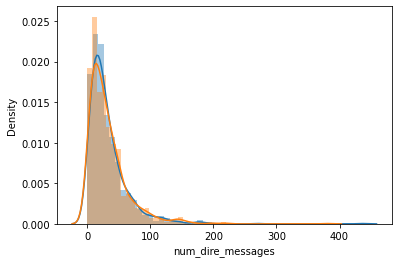

In [149]:
sns.distplot(radiant_wins['num_radiant_messages'])
sns.distplot(dire_wins['num_dire_messages'])

Dire and Radiant have roughly the same amount of messages overall

<AxesSubplot:xlabel='radiant_win', ylabel='Density'>

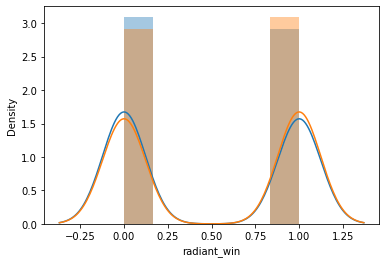

In [153]:
sns.distplot(radiant_wins['radiant_win'])
sns.distplot(dire_wins['radiant_win'])

Radiant and Dire have similar winrates with Dire taking a slight advantage

<AxesSubplot:xlabel='radiant_win', ylabel='num_radiant_messages'>

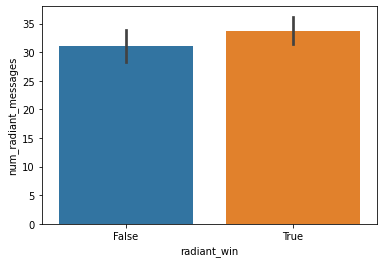

In [163]:
sns.barplot(data=radiant_wins, y="num_radiant_messages", x="radiant_win")

<AxesSubplot:xlabel='radiant_win', ylabel='num_dire_messages'>

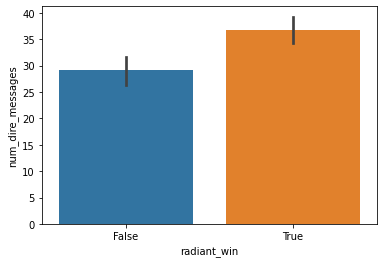

In [164]:
sns.barplot(data=dire_wins, y="num_dire_messages", x="radiant_win")